# 결정 트리(Decision Tree)
- 데이터의 규칙을 학습을 통해 자동으로 찾아내서 트리 기반의 분류 규칙을 만드는 것
- 어떤 기준으로 규칙을 만드는지에 따라 성능이 달라짐
- 사이킨런의 DecisionTreeClassifier는 지니 계수를 사용하여 지니 계수가 작은 속성부터 분할

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier(random_state=156)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

## 이진 트리 구조 시각화

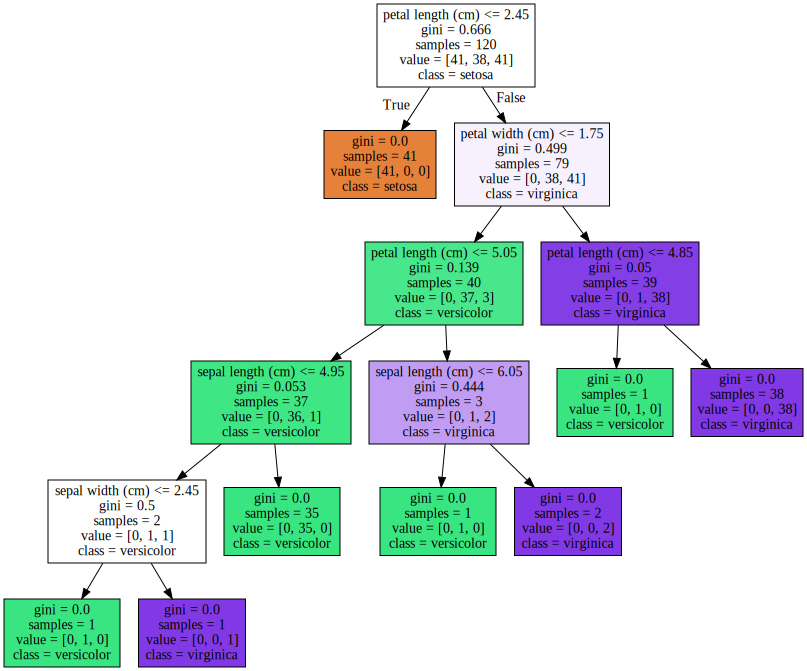

In [13]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 피처의 중요도

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.02850881 0.01250782 0.55942965 0.39955372]


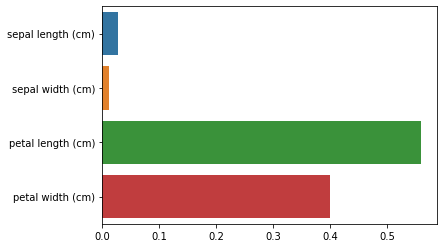

In [17]:
import seaborn as sns

print(iris.feature_names)
print(clf.feature_importances_)

sns.barplot(x=clf.feature_importances_, y=iris.feature_names)

## 결정 트리는 과적합(Overfitting)의 문제를 갖고있다

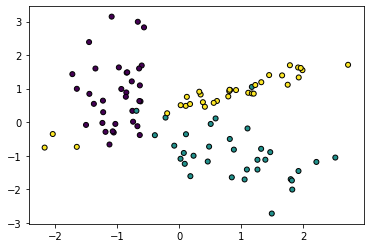

In [18]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='K')

In [19]:
import numpy as np 

def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

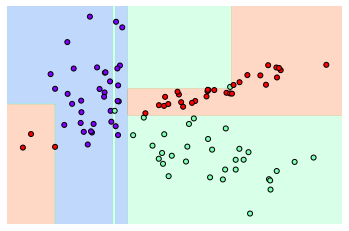

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_features, y_labels)
visualize_boundary(clf, X_features, y_labels)

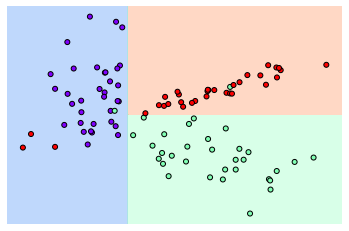

In [23]:
clf = DecisionTreeClassifier(min_samples_leaf=6)
clf.fit(X_features, y_labels)
visualize_boundary(clf, X_features, y_labels)